## Predicting heart disease using machine learning 

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capale of predicting whether or not someone someone has heart disease on their medical attributes.

We are goind to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Model
6. Experimentation

### 1. Problem defination

> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

### 2. Data

Data Dictionary
1.  age
2.  sex
3.  chest pain type (4 values)
4.  resting blood pressure
5.  serum cholestoral in mg/dl
6.  fasting blood sugar > 120 mg/dl
7.  resting electrocardiographic results (values 0,1,2)
8.  maximum heart rate achieved
9.  exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not someone has heart disease during the proof of concept, we'll pursue the project.

# Code

In [2]:
# importing some necessary tools

# Regular EDA(Exploratory data analysis) and plotting librarier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import recall_score, f1_score, plot_roc_curve

## Load Data

In [3]:
df = pd.read_csv("Heart-disease.csv")
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data exploration
The goal is to find out more about the data ad become a subject data expert on the datset you are working with.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. What are the outliers(samples which are too different from the reguler data) and why should we care about them?
5. How can we add, change remove features to get more out of our data?

In [6]:
# How many classes of data do we have
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

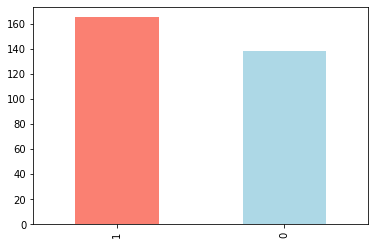

In [8]:
df.target.value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [10]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Are there any missing data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [14]:
 df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
# Compare target colm. with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


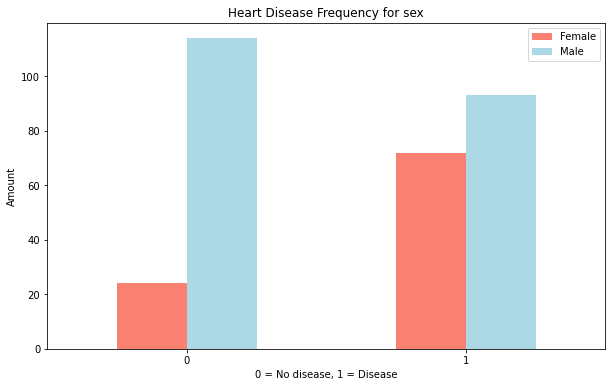

In [21]:
# Plot to visualize
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for sex")
plt.ylabel("Amount")
plt.xlabel("0 = No disease, 1 = Disease")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Age vs Max heart rate for heart disease

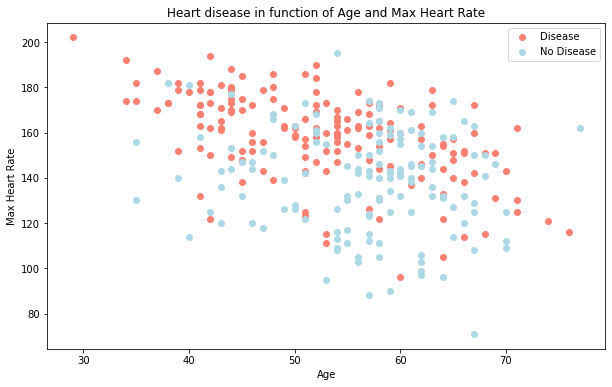

In [26]:
# Create a figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

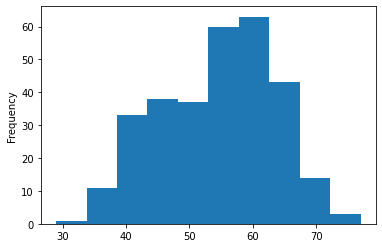

In [28]:
# Check the distribution of the age with a histogram
df.age.plot.hist();

### Heart disease frequency per chest pain type

In [29]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


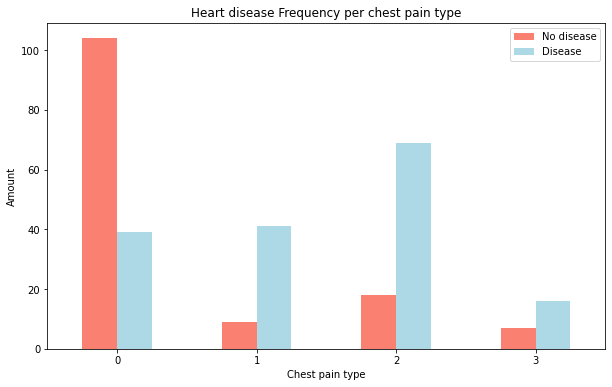

In [32]:
# Visualize it
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"]);
plt.title("Heart disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);

In [4]:
# Building a correlation matrix
df.corr() # Comparing each column to one another 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


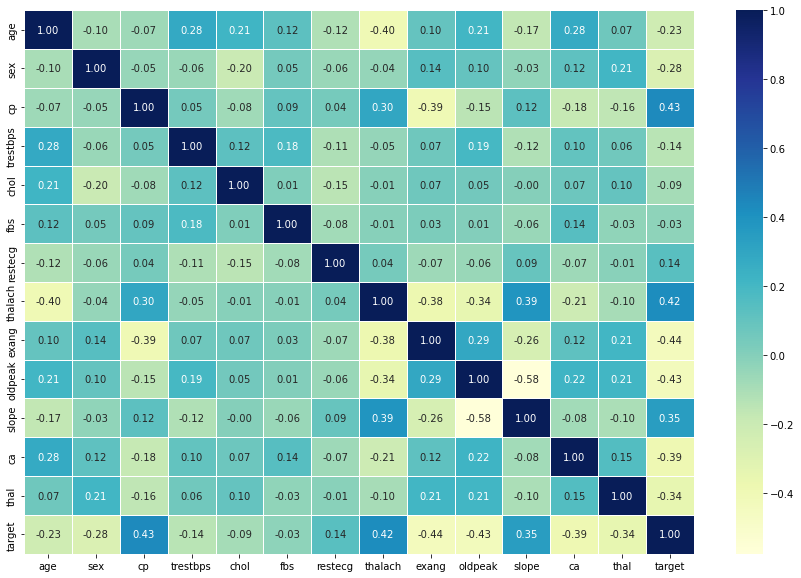

In [8]:
# Let's make our correlation matrix a little more prettier
corr_matrix = df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## 5. Modelling

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Split data into X and Y
X = df.drop("target", axis=1)
y = df.target

In [29]:
# Split data into train and test set
np.random.seed(42)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

Now we have our data split into training and test sets, it's time to build a machine learning model.

We'll train it(to find patterns) on the training set.

And we'll test it (use the patterns) on the test set.


### Model Choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`

In [30]:
# Put models in a dictionary
models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier()
}

# Function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    """
    #Set Random Seeds
    np.random.seed(13)
    # Make a dictionary to keep model Score
    model_scores={}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(X_test,y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(
                             models=models,
                             X_train=Xtrain,
                             X_test=Xtest,
                             y_train=ytrain,
                             y_test=ytest
                            )
model_scores

A:\MLEnv\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8524590163934426}

## Model Comparision

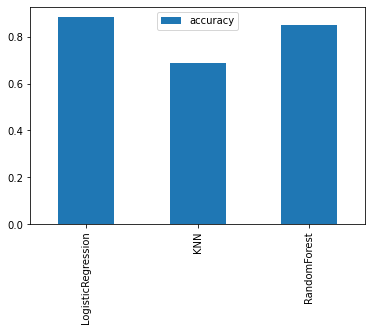

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know a model's first prediction aren't always what we should based our next steps off. 

Let's briefly go through each before we see them in action.

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* **Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* **Recall** - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.
* **Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve** - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* **Area Under Curve (AUC)** - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Hyperparameter Tuning

In [33]:
# Let's tune KNN
train_scores=[]
test_scores=[]

# Create a list of different values of n_neighbours
nighbours = range(1,21)

knn=KNeighborsClassifier()

#Loop through different n_neighbours
for i in nighbours:
    knn.set_params(n_neighbors=i)
    
    # fit the algo
    knn.fit(Xtrain, ytrain)
    
    train_scores.append(knn.score(Xtrain,ytrain))
    test_scores.append(knn.score(Xtest,ytest))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data: 75.41%


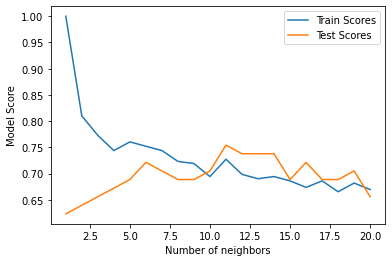

In [36]:
plt.plot(nighbours, train_scores, label="Train Scores")
plt.plot(nighbours, test_scores, label="Test Scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparamters tuning using RandomizedSearchCV

We are going to tune:
* Logistic Regression model
* RandomforestClassifier

 using RandomizedSearchCV

In [37]:
# Create a hyper parameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we have got hyperparmters grids setup for each of our models, let's tune them using RandomizedSearchCV

In [39]:
# Tune LogisticRagression
np.random.seed(42)

#Setup random search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(Xtrain, ytrain);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(Xtest,ytest)

0.8852459016393442

 Let's do the same for Random Forest classifier

In [43]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(Xtrain, ytrain);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [44]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [45]:
rs_rf.score(Xtest,ytest)

0.8688524590163934

### Tuning a model with GridSearchCV
The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In [47]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(Xtrain, ytrain);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [48]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Evaluate the model
gs_log_reg.score(Xtest, ytest)

0.8852459016393442

## Evaluating a classification model, beyond accuracy

We want:

* ROC curve and AUC score - `plot_roc_curve()`
* Confusion matrix - `confusion_matrix()`
* Classification report - `classification_report()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-score - `f1_score()`

In [52]:
# Make preidctions on test data
ypreds = gs_log_reg.predict(Xtest)
ypreds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
ytest

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### ROC Curve and AUC Scores

**What's a ROC curve?**

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function plot_roc_curve which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the `plot_roc_curve` function we can see it takes (estimator, X, y) as inputs. Where estimator is a fitted machine learning model and X and y are the data you'd like to test it on.

In our case, we'll use the `GridSearchCV` version of our LogisticRegression estimator, gs_log_reg as well as the test data, X_test and y_test.

A:\MLEnv\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


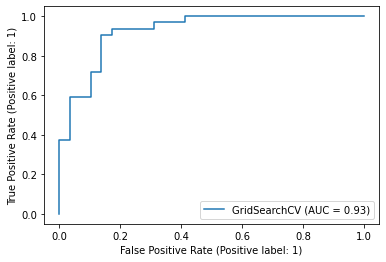

In [55]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, Xtest, ytest);

### Confusion Matrix

In [57]:
# Display confusion matrix
print(confusion_matrix(ytest, ypreds))

[[25  4]
 [ 3 29]]


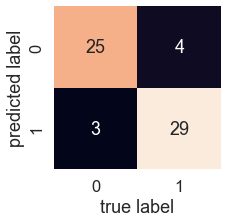

In [59]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(ytest, ypreds)

### Classification report


In [61]:
# Show classification report
print(classification_report(ytest, ypreds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall, f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

Let's remind ourselves of the best hyperparameters and then see them in action.

In [62]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [75]:
# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
cv_acc

0.8479781420765027

In [76]:
# Cross-validated precision score
cv_pre = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision")) # precision as scoring
cv_pre

0.8215873015873015

In [77]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [78]:
# Cross-validated f1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

Okay, we've got cross validated metrics, now what?

Let's visualize them.

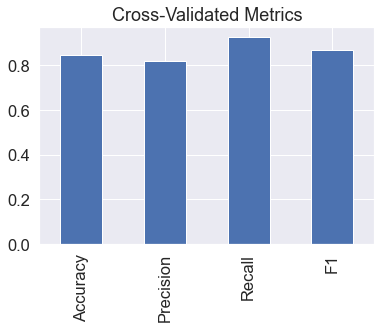

In [79]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_pre,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

In [81]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(Xtrain, ytrain);

In [82]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

In [83]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

Now we've match the feature coefficients to different features, let's visualize them.

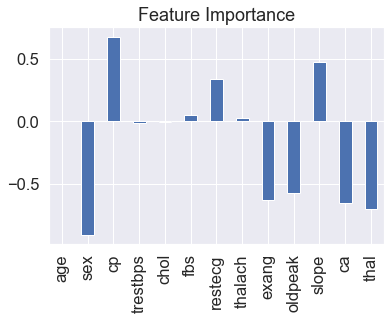

In [84]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.

We can see this by comparing the `sex` column to the `target` column.

In [86]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

In [87]:
# How about a positive correlation?

# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


According to the model, there's a positive correlation of 0.470, not as strong as `sex` and `target` but still more than 0.

This positive correlation means our model is picking up the pattern that as `slope` increases, so does the `target` value.

Doing this has a few benefits:

1. **Finding out more** - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
2. **Redirecting efforts** - If some features offer far more value than others, this may change how you collect data for different problems.
3. **Less but better** - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

## 6. Experimentation

Actually, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.